Plot MC chains for simulations on Pokec in order to illustrate the burn-in time.

Created on: 07/12/20

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [4]:
beta_f=8.0
gradient=10.0
graph = nx.read_graphml('Data/Bratislava_graph.graphml')

data=pd.read_csv(f"Data/mc_chain_examples/random_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")
data

,timestep,chain_0,chain_1,chain_2,chain_3,chain_4,chain_5,chain_6,chain_7,chain_8,...,chain_69,chain_70,chain_71,chain_72,chain_73,chain_74,chain_75,chain_76,chain_77,chain_78
0,0,-0.000811,0.006288,-0.003718,0.004462,-0.002096,-0.001082,0.001149,0.003786,0.008181,...,0.004665,-0.003718,0.010074,0.007234,-0.006828,-0.010615,-0.008181,0.003178,-0.008654,-0.002840
1,1000,0.001825,0.009600,-0.003110,0.005138,-0.002231,0.000135,0.003989,0.003313,0.005612,...,0.004733,-0.004868,0.011155,0.007910,-0.002975,-0.009938,-0.008248,0.002840,-0.003854,-0.001893
2,2000,0.001825,0.009871,-0.003718,0.008316,-0.003042,0.000473,0.003651,0.004665,0.003921,...,0.006017,-0.003651,0.011358,0.008451,-0.002772,-0.007302,-0.004733,0.003448,-0.000947,-0.002096
3,3000,0.003989,0.011832,-0.001149,0.009262,-0.003042,0.005071,0.006828,0.005003,0.006288,...,0.006896,-0.003854,0.014063,0.008316,-0.000947,-0.008586,-0.003921,0.002502,0.003313,-0.000406
4,4000,0.006288,0.017037,0.000000,0.008316,-0.000676,0.004597,0.011291,0.010074,0.008383,...,0.007234,0.000000,0.015415,0.007910,0.000744,-0.007302,-0.004395,0.002975,0.002975,-0.000203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995000,-0.168008,-0.170374,-0.175377,-0.171929,-0.174295,-0.182949,-0.174566,-0.174025,-0.175445,...,-0.169563,-0.174633,-0.176797,-0.175039,-0.173822,-0.176932,-0.174768,-0.174430,-0.171320,-0.174768
2996,2996000,-0.167737,-0.170239,-0.174904,-0.171726,-0.173349,-0.180583,-0.174971,-0.174160,-0.174633,...,-0.169833,-0.174836,-0.177000,-0.176188,-0.173011,-0.176932,-0.175783,-0.175985,-0.171861,-0.174228
2997,2997000,-0.166993,-0.170036,-0.172808,-0.171658,-0.172875,-0.180110,-0.174025,-0.173551,-0.174092,...,-0.169563,-0.175242,-0.177067,-0.177000,-0.173687,-0.176053,-0.175850,-0.175512,-0.171591,-0.174566
2998,2998000,-0.165100,-0.171726,-0.172064,-0.170915,-0.171523,-0.179907,-0.172740,-0.173890,-0.174971,...,-0.168684,-0.175039,-0.176188,-0.175985,-0.173281,-0.176323,-0.176594,-0.175039,-0.171929,-0.175309


In [5]:
num_cols = len(data.columns)
print(num_cols)

80


(array([-0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ]),
 <a list of 8 Text yticklabel objects>)

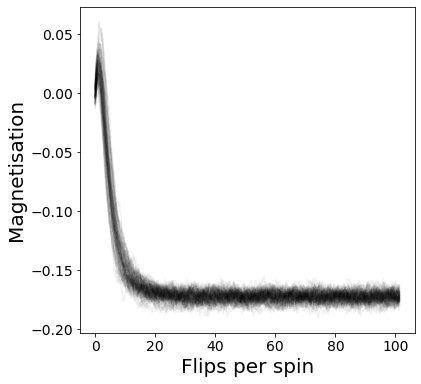

In [7]:
fig,ax=plt.subplots(figsize=(6,6))

for chain_index in range(num_cols-1) :
    flips_per_spin=[ k/len(graph) for k in data['timestep'].to_list()]
    plt.plot(flips_per_spin,data[f'chain_{chain_index}'].to_list(),'k',alpha=0.05)
    
plt.xlabel("Flips per spin",fontsize=20)
plt.ylabel("Magnetisation",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.savefig("Plots/spin_burn_in_random")